# Part 3 Visualisation of result of model with tuning angle distribution

## Environment Building

In [1]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image, ImageFilter
import random

# tensorflow
import tensorflow as tf
import keras
from tensorflow.keras.models import load_model


import cv2
from imgaug import augmenters as img_aug


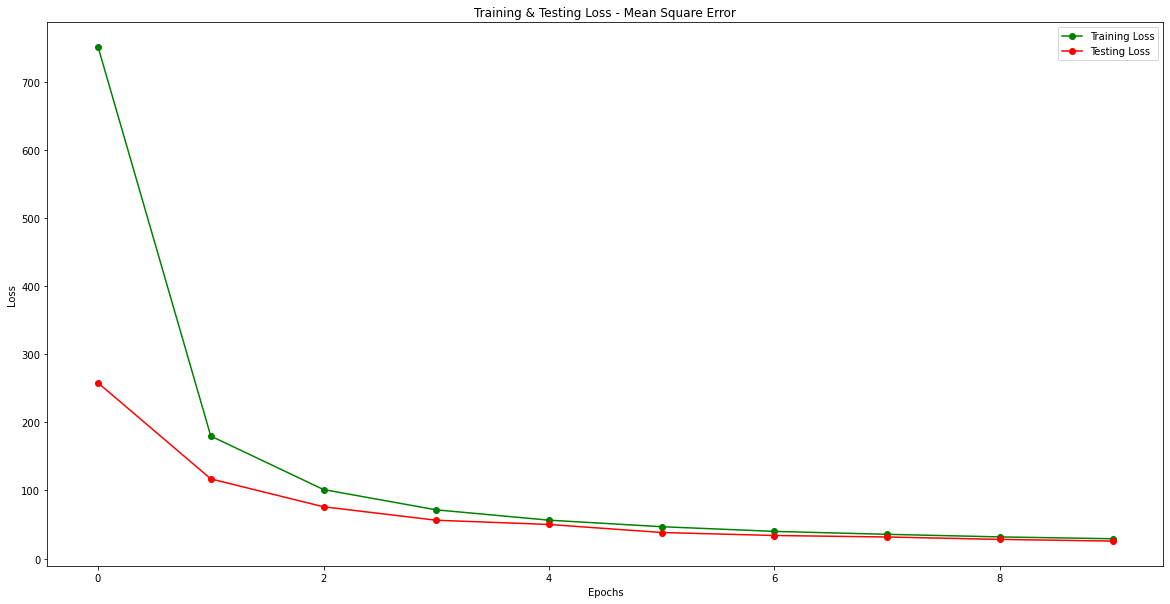

In [106]:
history_ci = pickle.load(open('../angle_prediction/aug/history_aug_ci.pickle','rb'))
epochsnum = [i for i in range(10)]
train_loss = history_ci['loss']

val_loss = history_ci['val_loss']

fig , ax = plt.subplots(1,1)
fig.set_size_inches(20,10)

ax.plot(epochsnum , train_loss , 'go-' , label = 'Training Loss')
ax.plot(epochsnum , val_loss , 'ro-' , label = 'Testing Loss')
ax.set_title('Training & Testing Loss - Mean Square Error')
ax.legend()
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
plt.show()

# Image Visualisation


In [52]:
model_output_dir = '../angle_prediction/aug'

In [66]:
df_ci_=pd.read_csv('../angle_prediction/csv_data/testdf_ci_aug.csv')


In [37]:
df_ci

Imagepath  Angle
0     ../ccnn_output_sullychen/instance_image/11926.jpg  15.93
1     ../ccnn_output_sullychen/instance_image/28667_... -48.70
2     ../ccnn_output_sullychen/instance_image/60874.jpg  71.80
3     ../ccnn_output_sullychen/instance_image/32691_...  32.97
4     ../ccnn_output_sullychen/instance_image/21199_... -71.50
...                                                 ...    ...
8855  ../ccnn_output_sullychen/instance_image/38965_...  46.68
8856  ../ccnn_output_sullychen/instance_image/31179_...  33.08
8857  ../ccnn_output_sullychen/instance_image/39579_...  52.60
8858  ../ccnn_output_sullychen/instance_image/45476.jpg   2.62
8859  ../ccnn_output_sullychen/instance_image/39072_...  24.00

[8860 rows x 2 columns]

In [71]:
df_ci_t = df_ci_[~df_ci_['Imagepath'].str.contains('_z')][~df_ci_['Imagepath'].str.contains('_f')][~df_ci_['Imagepath'].str.contains('_p')][~df_ci_['Imagepath'].str.contains('_bl')][~df_ci_['Imagepath'].str.contains('_br')]


/tmp/.tyh002/ipykernel_8484/1766796329.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ci_t = df_ci_[~df_ci_['Imagepath'].str.contains('_z')][~df_ci_['Imagepath'].str.contains('_f')][~df_ci_['Imagepath'].str.contains('_p')][~df_ci_['Imagepath'].str.contains('_bl')][~df_ci_['Imagepath'].str.contains('_br')]
/tmp/.tyh002/ipykernel_8484/1766796329.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_li_t = df_li_[~df_li_['Imagepath'].str.contains('_z')][~df_li_['Imagepath'].str.contains('_f')][~df_li_['Imagepath'].str.contains('_p')][~df_li_['Imagepath'].str.contains('_bl')][~df_li_['Imagepath'].str.contains('_br')]


In [45]:
#wtih gpu
def my_imread(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def img_preprocess(image):

    height, _, _ = image.shape
    image = image[int(height/2):,:,:]  # remove top 0.5 of the image, as it is not relavant for lane following
    image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)  # Nvidia model said it is best to use YUV color space
    image = cv2.GaussianBlur(image, (3,3), 0)
    image = cv2.resize(image, (200,66)) # input image size (200,66) Nvidia model
    image = image / 255 # normalizing, the processed image becomes black for some reason.  do we need this?
    return image

In [46]:
def image_gen_vis_v2(image_paths, steering_angles, batch_size,rand):
    while True:
        batch_images = []
        batch_steering_angles = []
        batch_path = []
        
        for i in range(batch_size):
            if isinstance(rand, str):
                random_index = random.randint(0, len(image_paths) - 1)
            else:
                random_index = rand
            image_path = image_paths[random_index]
            image = my_imread(image_paths[random_index])
            steering_angle = steering_angles[random_index]
             
            image = img_preprocess(image)
            batch_images.append(image)
            batch_steering_angles.append(steering_angle)
            batch_path.append(image_paths[random_index])
            
        yield( np.asarray(batch_images), np.asarray(batch_steering_angles),batch_path)
            
            

In [95]:
def get_path_list_try2(lo_angle,up_angle):
    df_test_ci = df_ci[df_ci['Angle']>=lo_angle][df_ci['Angle']<=up_angle].reset_index()
    df_test_cb = df_cb[df_ci['Angle']>=lo_angle][df_cb['Angle']<=up_angle].reset_index()
    df_test_li = df_li[df_li['Angle']>=lo_angle][df_li['Angle']<=up_angle].reset_index()
    df_test_lb = df_lb[df_lb['Angle']>=lo_angle][df_lb['Angle']<=up_angle].reset_index()
    df_test_o = df_o[df_o['Angle']>=lo_angle][df_o['Angle']<=up_angle].reset_index()
    df_test_try = df_try[df_try['Angle']>=lo_angle][df_try['Angle']<=up_angle].reset_index()
    df_test_augci = df_ci_t[df_ci_t['Angle']>=lo_angle][df_ci_t['Angle']<=up_angle].reset_index()
    testx_ci,testx_cb,testx_li,testx_lb,testx_o,testx_try,testx_augci = list(df_test_ci['Imagepath']),list(df_test_cb['Imagepath']),list(df_test_li['Imagepath']),list(df_test_lb['Imagepath']),list(df_test_o['Imagepath']),list(df_test_try['Imagepath']),list(df_test_augci['Imagepath'])
    testy_ci,testy_cb,testy_li,testy_lb,testy_o,testy_try,testy_augci = list(df_test_ci['Angle']),list(df_test_cb['Angle']),list(df_test_li['Angle']),list(df_test_lb['Angle']),list(df_test_o['Angle']),list(df_test_try['Angle']),list(df_test_augci['Angle'])
    return testx_ci,testx_cb,testx_li,testx_lb,testx_o,testx_try,testx_augci, testy_ci,testy_cb,testy_li,testy_lb,testy_o ,testy_try,testy_augci

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

def summarize(Y_true, Y_pred):
    mse = mean_squared_error(Y_true, Y_pred)
    print(f'mse = {mse:.2}')


def predict_analysis(X, Y, method):
    model = load_model(f'{model_output_dir}/lane_navigation_final_'+method+'.h5')
    Y_pred = model.predict(X)
    summarize(Y, Y_pred)
    return Y_pred

def predict_analysis_v2(X, Y, method):
    model = load_model(f'{model_output_dir}/lane_navigation_final_'+method+'.h5')
    Y_pred_ = model.predict(X)
    Y_pred = []
    diffdict = {}

    for i in range(len(Y_pred_)):
        Y_pred.append(float(Y_pred_[i][0]))
        
    for i in range(len(Y)):
        diffdict.update({str(i): abs(Y[i]-Y_pred[i])})
    maxid = int(list(diffdict.keys())[list(diffdict.values()).index(max(diffdict.values()))])
    summarize(Y, Y_pred)
    
    return Y_pred, maxid

# photo finding

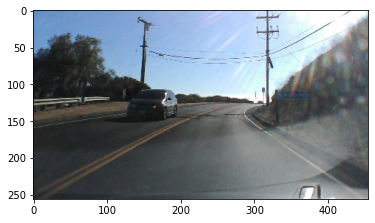

In [78]:
idimg = 26432
plt.imshow(my_imread('../SullyChen/data/'+str(idimg)+'.jpg'))

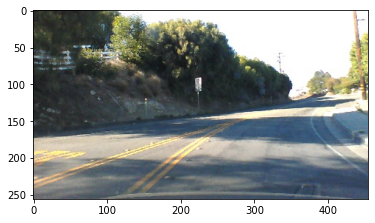

In [17]:
idimg = 36012
plt.imshow(my_imread('../SullyChen/data/'+str(idimg)+'.jpg'))

### Angle within range -5 to 5

/tmp/.tyh002/ipykernel_8484/3442796340.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_ci = df_ci[df_ci['Angle']>=lo_angle][df_ci['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_8484/3442796340.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_cb = df_cb[df_ci['Angle']>=lo_angle][df_cb['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_8484/3442796340.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_li = df_li[df_li['Angle']>=lo_angle][df_li['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_8484/3442796340.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_lb = df_lb[df_lb['Angle']>=lo_angle][df_lb['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_8484/3442796340.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_o = df_o[df_o['Angle']>=lo_angle][df_

mse = 1.8e+01
mse = 0.44
mse = 1.3
mse = 0.63
mse = 0.84
mse = 4.2e+01
mse = 4.7e+01


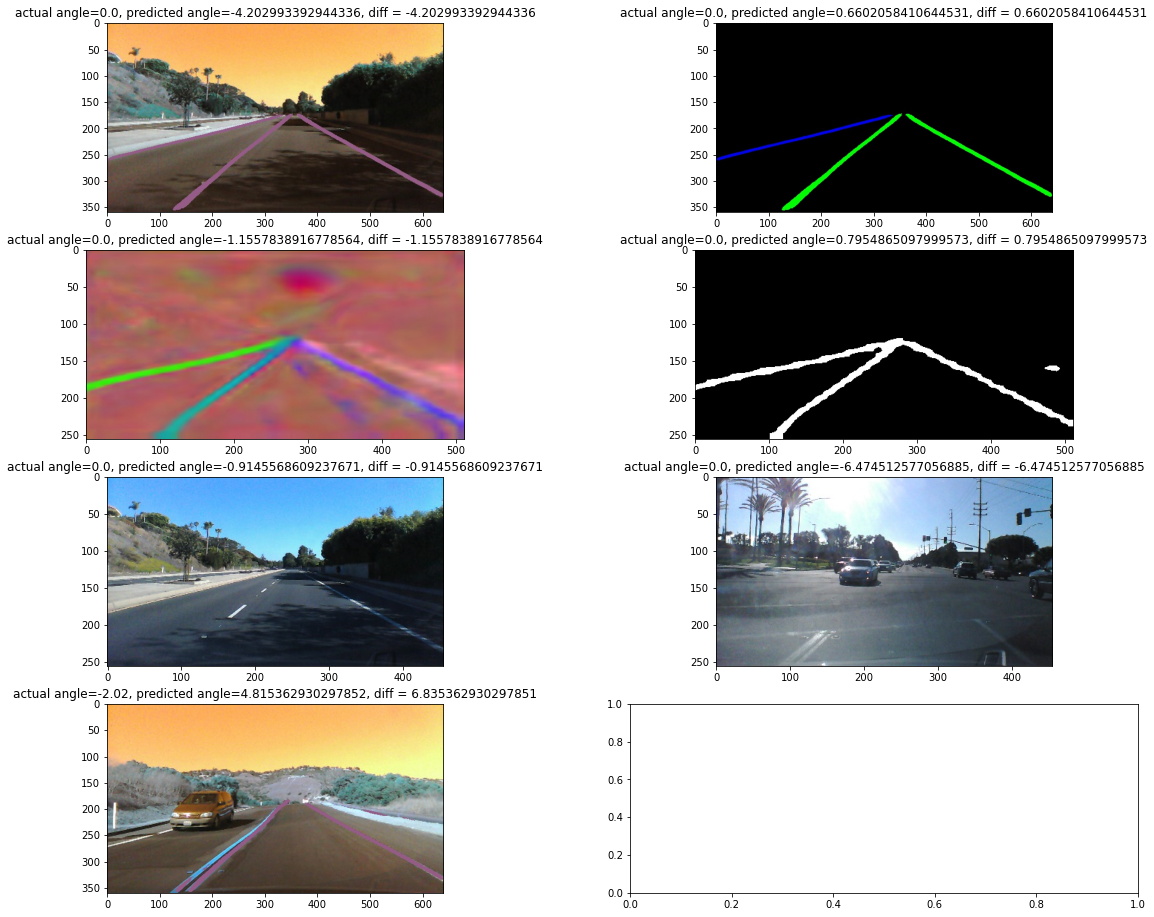

In [96]:
lo_angle = -5
up_angle = 5
idx = 2
testx_ci,testx_cb,testx_li,testx_lb,testx_o, testx_try,testx_augci,testy_ci,testy_cb,testy_li,testy_lb,testy_o,testy_try,testy_augci = get_path_list_try2(lo_angle,up_angle)

fig, axes = plt.subplots(4, 2, figsize=(20,16))
 

i=0
x,y,z,m=0,0,0,'ci'
for testx,testy in zip([testx_ci,testx_cb,testx_li,testx_lb,testx_o, testx_try,testx_augci],[testy_ci,testy_cb,testy_li,testy_lb,testy_o,testy_try,testy_augci]):  
    
    if i==1:
        x,y,m=0,1,'cb'
    elif i==2:
        x,y,m=1,0,'li'
    elif i==3:
        x,y,m=1,1,'lb'
    elif i==4:
        x,y,m=1,1,'o'
    elif i==5:
        m='try'
    elif i==6:
        m='aug_ci'
    X_test, y_test,pathx = next(image_gen_vis_v2(testx,testy, 256,idx))

    #last digit if wanna point to id, input int, if want random, input 'random'
    y_pred = predict_analysis(X_test, y_test,m)
    axes[i//2][i%2].imshow(my_imread(pathx[idx]))
    axes[i//2][i%2].set_title(f"actual angle={y_test[idx]}, predicted angle={float(y_pred[idx])}, diff = {float(y_pred[idx])-y_test[idx]}")
    i+=1
    


### Angle within range of degree 5 to 30

/tmp/.tyh002/ipykernel_8484/3442796340.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_ci = df_ci[df_ci['Angle']>=lo_angle][df_ci['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_8484/3442796340.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_cb = df_cb[df_ci['Angle']>=lo_angle][df_cb['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_8484/3442796340.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_li = df_li[df_li['Angle']>=lo_angle][df_li['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_8484/3442796340.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_lb = df_lb[df_lb['Angle']>=lo_angle][df_lb['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_8484/3442796340.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_o = df_o[df_o['Angle']>=lo_angle][df_

mse = 1.1e+01
mse = 3.3e+01
mse = 1.5e+01
mse = 2.4e+01
mse = 8.4
../SullyChen/data/26432.jpg 6.55
mse = 4.9
mse = 9.5


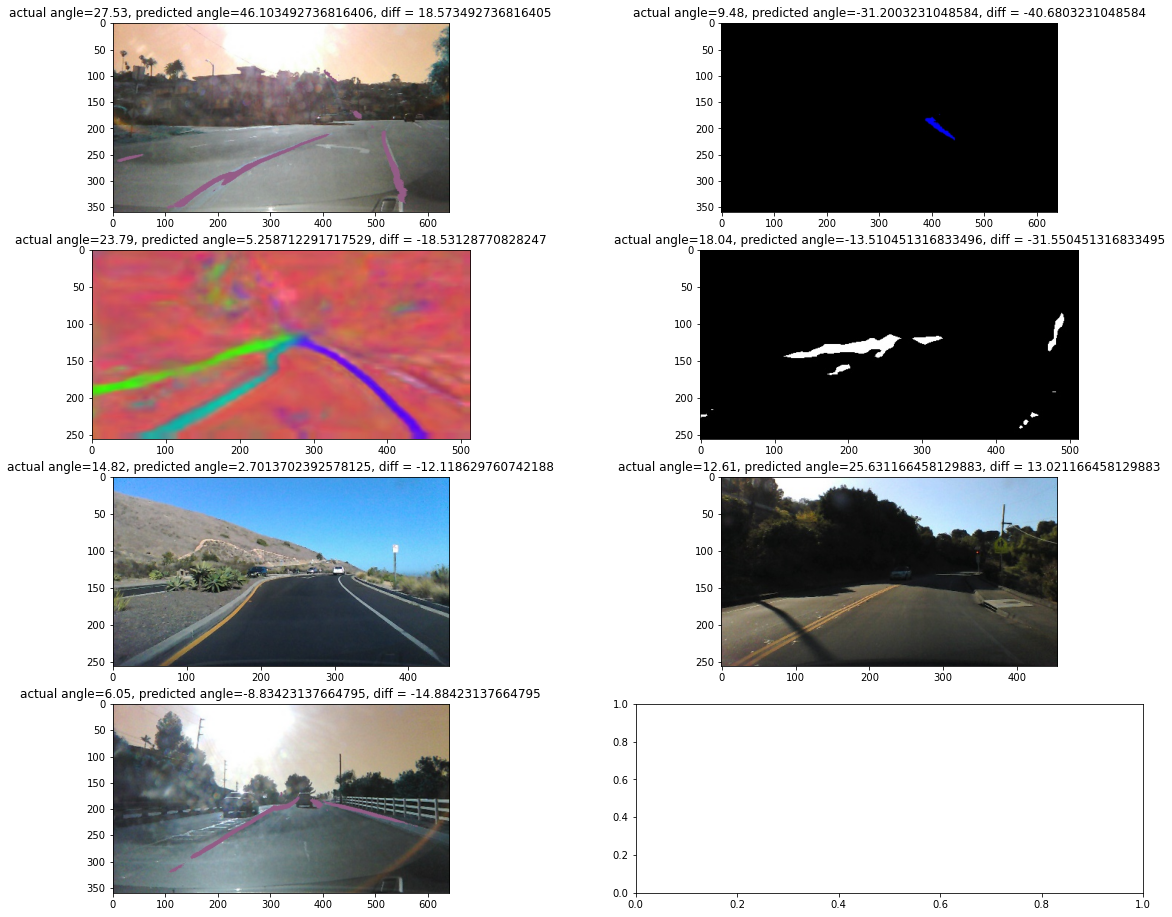

In [97]:
lo_angle = 5
up_angle = 30
idx = 'random'
testx_ci,testx_cb,testx_li,testx_lb,testx_o, testx_try,testx_augci,testy_ci,testy_cb,testy_li,testy_lb,testy_o,testy_try,testy_augci = get_path_list_try2(lo_angle,up_angle)

fig, axes = plt.subplots(4, 2, figsize=(20,16))
 

i=0
x,y,z,m=0,0,0,'ci'
for testx,testy in zip([testx_ci,testx_cb,testx_li,testx_lb,testx_o, testx_try,testx_augci],[testy_ci,testy_cb,testy_li,testy_lb,testy_o,testy_try,testy_augci]):  
    
    if i==1:
        x,y,m=0,1,'cb'
    elif i==2:
        x,y,m=1,0,'li'
    elif i==3:
        x,y,m=1,1,'lb'
    elif i==4:
        x,y,m=1,1,'o'
    elif i==5:
        m='try'
    elif i==6:
        m='aug_ci'
    try:
        X_test, y_test,pathx = next(image_gen_vis_v2(testx,testy, 256,idx))
    except:
        print(testx[0],testy[0])
    #last digit if wanna point to id, input int, if want random, input 'random'
    y_pred,ind = predict_analysis_v2(X_test, y_test,m)
    axes[i//2][i%2].imshow(my_imread(pathx[ind]))
    axes[i//2][i%2].set_title(f"actual angle={y_test[ind]}, predicted angle={float(y_pred[ind])}, diff = {float(y_pred[ind])-y_test[ind]}")
    i+=1
    


/tmp/.tyh002/ipykernel_8484/3442796340.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_ci = df_ci[df_ci['Angle']>=lo_angle][df_ci['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_8484/3442796340.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_cb = df_cb[df_ci['Angle']>=lo_angle][df_cb['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_8484/3442796340.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_li = df_li[df_li['Angle']>=lo_angle][df_li['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_8484/3442796340.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_lb = df_lb[df_lb['Angle']>=lo_angle][df_lb['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_8484/3442796340.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_o = df_o[df_o['Angle']>=lo_angle][df_

mse = 1.4e+01
mse = 2.7e+01
mse = 1.9e+01
mse = 4e+01
mse = 1e+01
../SullyChen/data/56182.jpg -9.48
mse = 7.5
mse = 1.6e+01


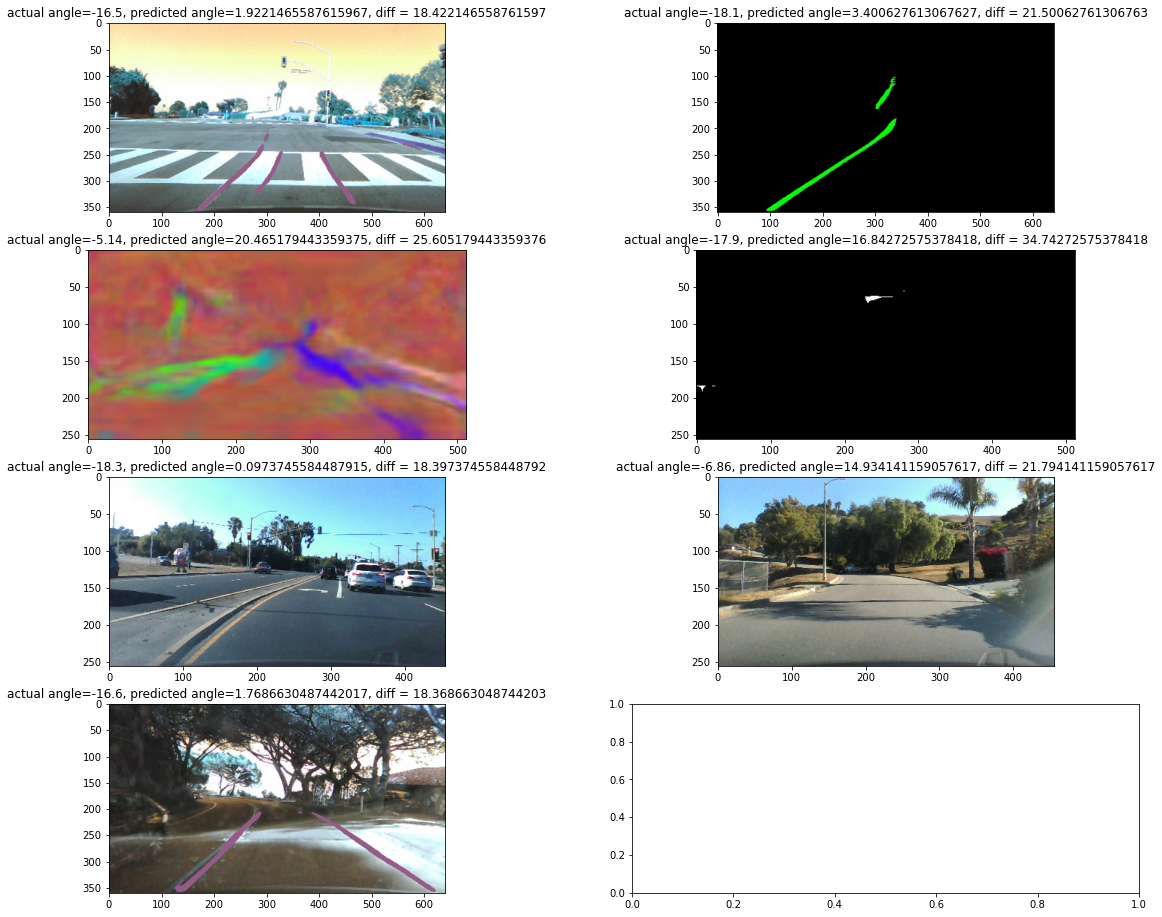

In [98]:
lo_angle = -30
up_angle = -5
idx = 'random'
testx_ci,testx_cb,testx_li,testx_lb,testx_o, testx_try,testx_augci,testy_ci,testy_cb,testy_li,testy_lb,testy_o,testy_try,testy_augci = get_path_list_try2(lo_angle,up_angle)

fig, axes = plt.subplots(4, 2, figsize=(20,16))
 

i=0
x,y,z,m=0,0,0,'ci'
for testx,testy in zip([testx_ci,testx_cb,testx_li,testx_lb,testx_o, testx_try,testx_augci],[testy_ci,testy_cb,testy_li,testy_lb,testy_o,testy_try,testy_augci]):  
    
    if i==1:
        x,y,m=0,1,'cb'
    elif i==2:
        x,y,m=1,0,'li'
    elif i==3:
        x,y,m=1,1,'lb'
    elif i==4:
        x,y,m=1,1,'o'
    elif i==5:
        m='try'
    elif i==6:
        m='aug_ci'
    try:
        X_test, y_test,pathx = next(image_gen_vis_v2(testx,testy, 256,idx))
    except:
        print(testx[0],testy[0])
    #last digit if wanna point to id, input int, if want random, input 'random'
    y_pred,ind = predict_analysis_v2(X_test, y_test,m)
    axes[i//2][i%2].imshow(my_imread(pathx[ind]))
    axes[i//2][i%2].set_title(f"actual angle={y_test[ind]}, predicted angle={float(y_pred[ind])}, diff = {float(y_pred[ind])-y_test[ind]}")
    i+=1
    


### Angle within range 30 to 60

/tmp/.tyh002/ipykernel_8484/3442796340.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_ci = df_ci[df_ci['Angle']>=lo_angle][df_ci['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_8484/3442796340.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_cb = df_cb[df_ci['Angle']>=lo_angle][df_cb['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_8484/3442796340.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_li = df_li[df_li['Angle']>=lo_angle][df_li['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_8484/3442796340.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_lb = df_lb[df_lb['Angle']>=lo_angle][df_lb['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_8484/3442796340.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_o = df_o[df_o['Angle']>=lo_angle][df_

mse = 3.8e+01
mse = 3.7e+02
mse = 7.5e+01
mse = 1.3e+02
mse = 3.7e+01
../SullyChen/data/3447.jpg 30.04
mse = 2.6
mse = 1.1e+01


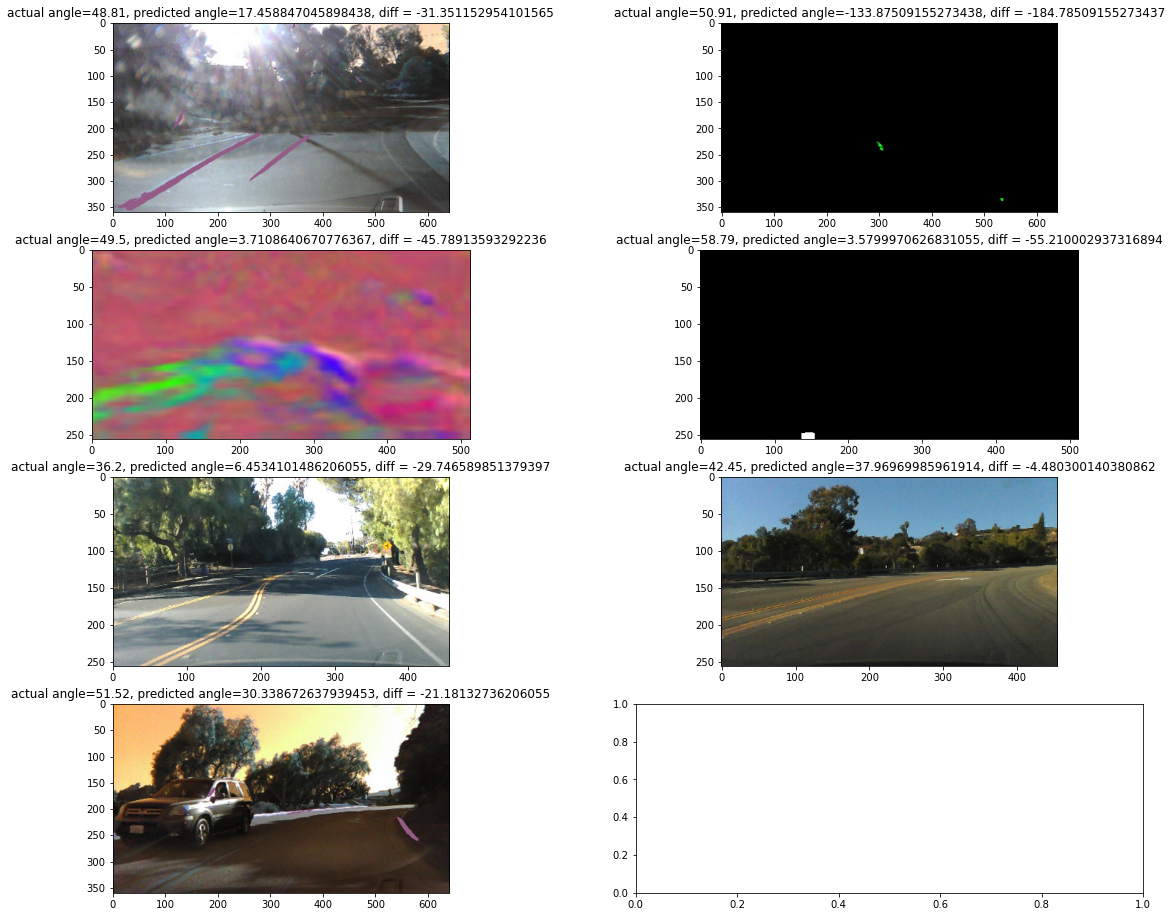

In [99]:
lo_angle = 30
up_angle = 60
idx = 'random'
testx_ci,testx_cb,testx_li,testx_lb,testx_o, testx_try,testx_augci,testy_ci,testy_cb,testy_li,testy_lb,testy_o,testy_try,testy_augci = get_path_list_try2(lo_angle,up_angle)

fig, axes = plt.subplots(4, 2, figsize=(20,16))
 

i=0
x,y,z,m=0,0,0,'ci'
for testx,testy in zip([testx_ci,testx_cb,testx_li,testx_lb,testx_o, testx_try,testx_augci],[testy_ci,testy_cb,testy_li,testy_lb,testy_o,testy_try,testy_augci]):  
    
    if i==1:
        x,y,m=0,1,'cb'
    elif i==2:
        x,y,m=1,0,'li'
    elif i==3:
        x,y,m=1,1,'lb'
    elif i==4:
        x,y,m=1,1,'o'
    elif i==5:
        m='try'
    elif i==6:
        m='aug_ci'
    try:
        X_test, y_test,pathx = next(image_gen_vis_v2(testx,testy, 256,idx))
    except:
        print(testx[0],testy[0])
    #last digit if wanna point to id, input int, if want random, input 'random'
    y_pred,ind = predict_analysis_v2(X_test, y_test,m)
    axes[i//2][i%2].imshow(my_imread(pathx[ind]))
    axes[i//2][i%2].set_title(f"actual angle={y_test[ind]}, predicted angle={float(y_pred[ind])}, diff = {float(y_pred[ind])-y_test[ind]}")
    i+=1
    


/tmp/.tyh002/ipykernel_8484/3442796340.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_ci = df_ci[df_ci['Angle']>=lo_angle][df_ci['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_8484/3442796340.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_cb = df_cb[df_ci['Angle']>=lo_angle][df_cb['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_8484/3442796340.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_li = df_li[df_li['Angle']>=lo_angle][df_li['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_8484/3442796340.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_lb = df_lb[df_lb['Angle']>=lo_angle][df_lb['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_8484/3442796340.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_o = df_o[df_o['Angle']>=lo_angle][df_

mse = 2.8e+01
mse = 1.1e+02
mse = 6.9e+01
mse = 7.8e+01
mse = 3.4e+01
../SullyChen/data/5132.jpg -30.0
mse = 2.9
mse = 1.1e+01


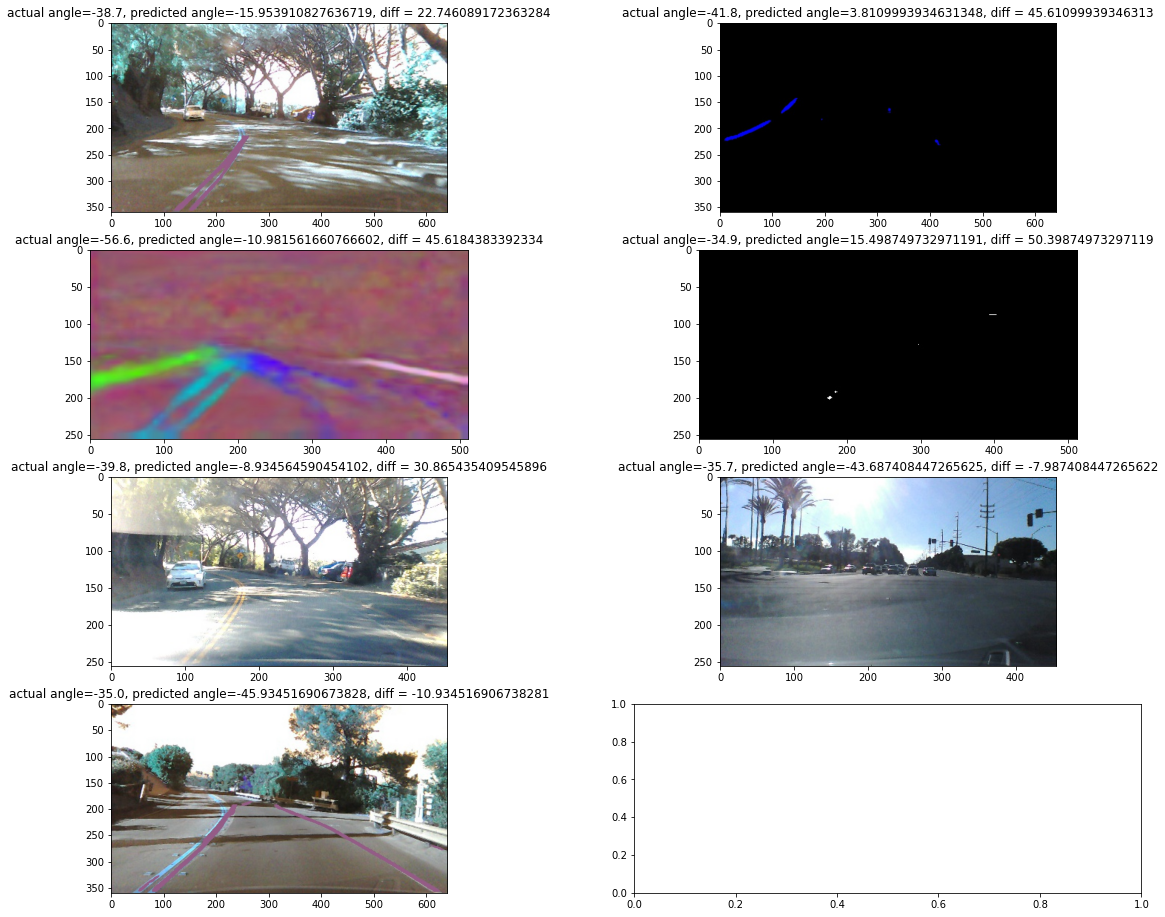

In [100]:
lo_angle = -60
up_angle = -30
idx = 'random'
testx_ci,testx_cb,testx_li,testx_lb,testx_o, testx_try,testx_augci,testy_ci,testy_cb,testy_li,testy_lb,testy_o,testy_try,testy_augci = get_path_list_try2(lo_angle,up_angle)

fig, axes = plt.subplots(4, 2, figsize=(20,16))
 

i=0
x,y,z,m=0,0,0,'ci'
for testx,testy in zip([testx_ci,testx_cb,testx_li,testx_lb,testx_o, testx_try,testx_augci],[testy_ci,testy_cb,testy_li,testy_lb,testy_o,testy_try,testy_augci]):  
    
    if i==1:
        x,y,m=0,1,'cb'
    elif i==2:
        x,y,m=1,0,'li'
    elif i==3:
        x,y,m=1,1,'lb'
    elif i==4:
        x,y,m=1,1,'o'
    elif i==5:
        m='try'
    elif i==6:
        m='aug_ci'
    try:
        X_test, y_test,pathx = next(image_gen_vis_v2(testx,testy, 256,idx))
    except:
        print(testx[0],testy[0])
    #last digit if wanna point to id, input int, if want random, input 'random'
    y_pred,ind = predict_analysis_v2(X_test, y_test,m)
    axes[i//2][i%2].imshow(my_imread(pathx[ind]))
    axes[i//2][i%2].set_title(f"actual angle={y_test[ind]}, predicted angle={float(y_pred[ind])}, diff = {float(y_pred[ind])-y_test[ind]}")
    i+=1
    


### Angle within range 60 to 90

/tmp/.tyh002/ipykernel_8484/3442796340.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_ci = df_ci[df_ci['Angle']>=lo_angle][df_ci['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_8484/3442796340.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_cb = df_cb[df_ci['Angle']>=lo_angle][df_cb['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_8484/3442796340.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_li = df_li[df_li['Angle']>=lo_angle][df_li['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_8484/3442796340.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_lb = df_lb[df_lb['Angle']>=lo_angle][df_lb['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_8484/3442796340.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_o = df_o[df_o['Angle']>=lo_angle][df_

mse = 5.5e+01
mse = 3.2e+02
mse = 9.4e+01
mse = 2.7e+02
mse = 6.6e+01
../SullyChen/data/23375.jpg 65.23
mse = 6.0
mse = 8.5


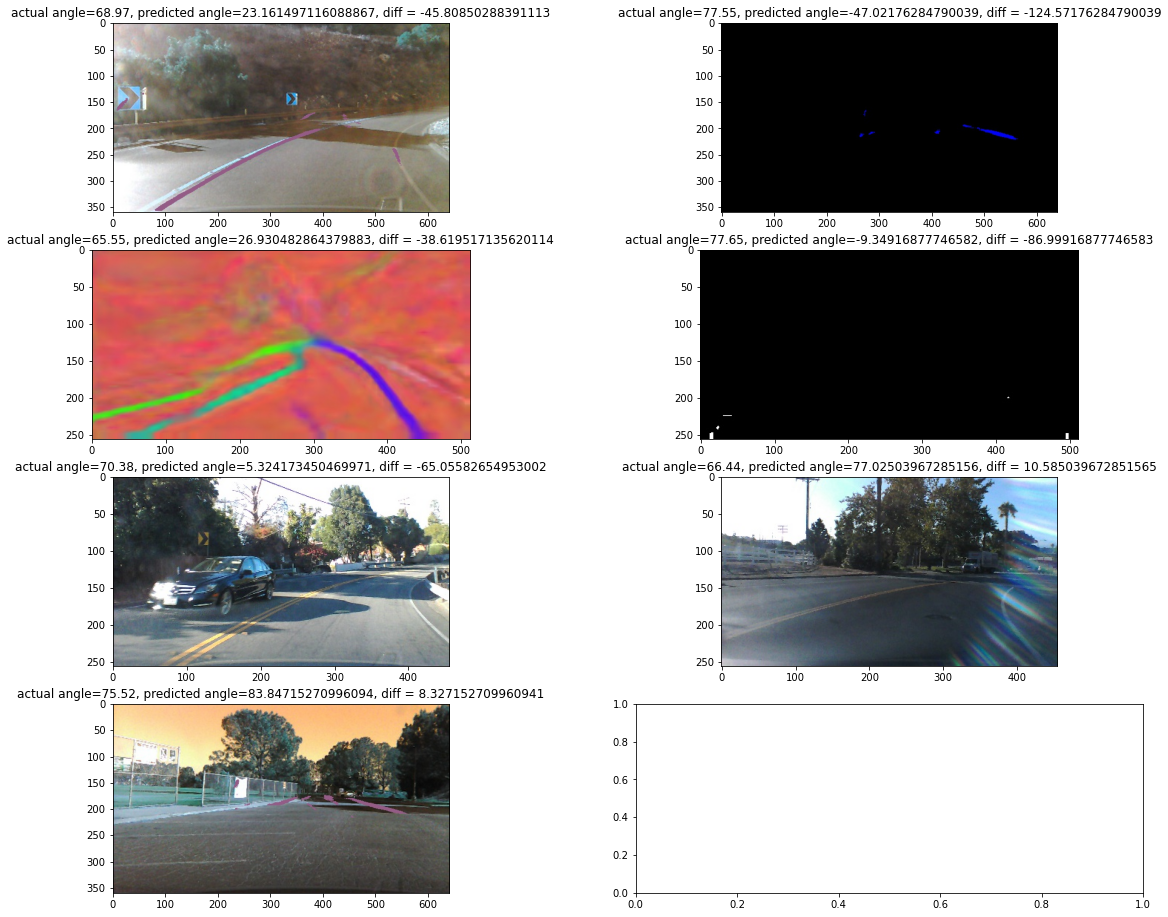

In [101]:
lo_angle = 60
up_angle = 90
idx = 'random'
testx_ci,testx_cb,testx_li,testx_lb,testx_o, testx_try,testx_augci,testy_ci,testy_cb,testy_li,testy_lb,testy_o,testy_try,testy_augci = get_path_list_try2(lo_angle,up_angle)

fig, axes = plt.subplots(4, 2, figsize=(20,16))
 

i=0
x,y,z,m=0,0,0,'ci'
for testx,testy in zip([testx_ci,testx_cb,testx_li,testx_lb,testx_o, testx_try,testx_augci],[testy_ci,testy_cb,testy_li,testy_lb,testy_o,testy_try,testy_augci]):  
    
    if i==1:
        x,y,m=0,1,'cb'
    elif i==2:
        x,y,m=1,0,'li'
    elif i==3:
        x,y,m=1,1,'lb'
    elif i==4:
        x,y,m=1,1,'o'
    elif i==5:
        m='try'
    elif i==6:
        m='aug_ci'
    try:
        X_test, y_test,pathx = next(image_gen_vis_v2(testx,testy, 256,idx))
    except:
        print(testx[0],testy[0])
    #last digit if wanna point to id, input int, if want random, input 'random'
    y_pred,ind = predict_analysis_v2(X_test, y_test,m)
    axes[i//2][i%2].imshow(my_imread(pathx[ind]))
    axes[i//2][i%2].set_title(f"actual angle={y_test[ind]}, predicted angle={float(y_pred[ind])}, diff = {float(y_pred[ind])-y_test[ind]}")
    i+=1
    


/tmp/.tyh002/ipykernel_8484/3442796340.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_ci = df_ci[df_ci['Angle']>=lo_angle][df_ci['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_8484/3442796340.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_cb = df_cb[df_ci['Angle']>=lo_angle][df_cb['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_8484/3442796340.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_li = df_li[df_li['Angle']>=lo_angle][df_li['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_8484/3442796340.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_lb = df_lb[df_lb['Angle']>=lo_angle][df_lb['Angle']<=up_angle].reset_index()
/tmp/.tyh002/ipykernel_8484/3442796340.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_o = df_o[df_o['Angle']>=lo_angle][df_

mse = 5.3e+01
mse = 6.1e+02
mse = 1.1e+02
mse = 2.4e+02
mse = 9.6e+01
../SullyChen/data/6129.jpg -60.7
mse = 7.7
mse = 1.2e+01


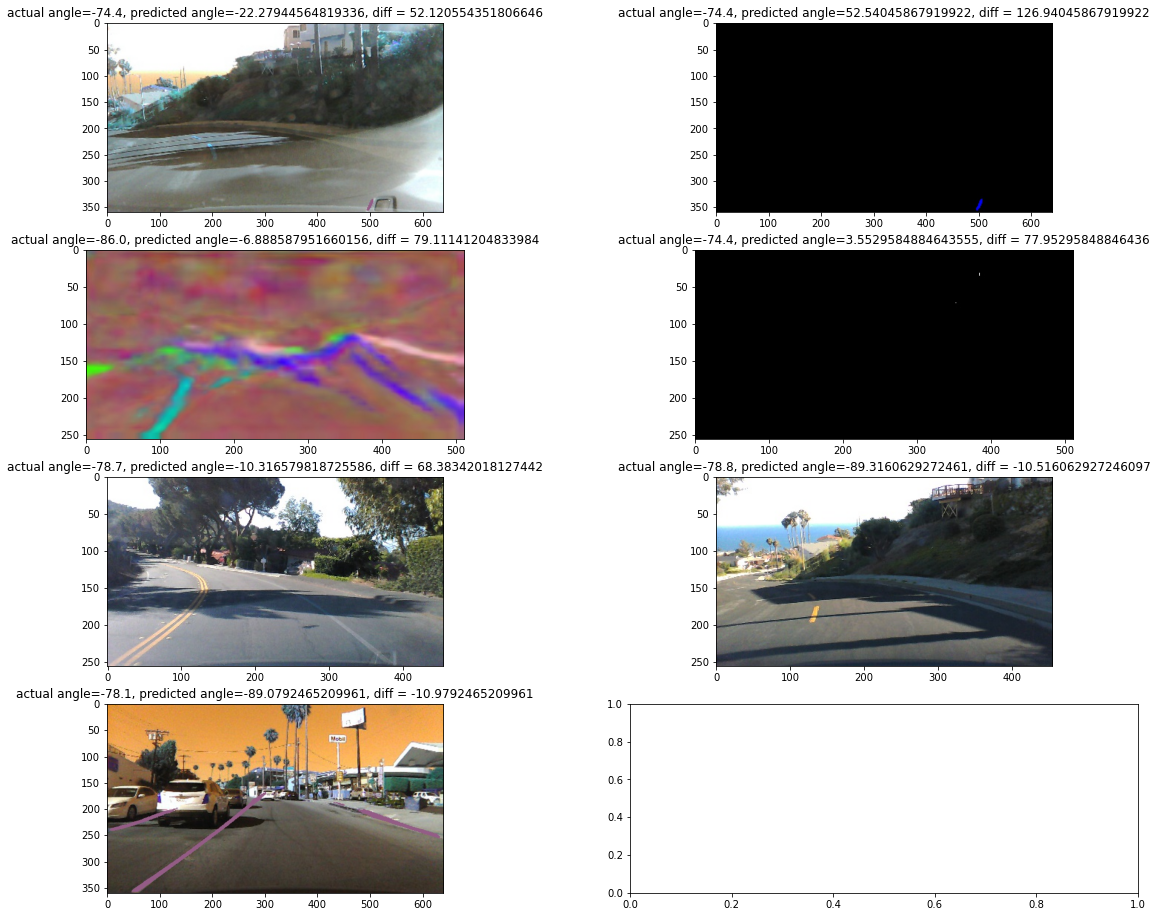

In [102]:
lo_angle = -90
up_angle = -60
idx = 'random'
testx_ci,testx_cb,testx_li,testx_lb,testx_o, testx_try,testx_augci,testy_ci,testy_cb,testy_li,testy_lb,testy_o,testy_try,testy_augci = get_path_list_tryzzz(lo_angle,up_angle)

fig, axes = plt.subplots(4, 2, figsize=(20,16))
 

i=0
x,y,z,m=0,0,0,'ci'
for testx,testy in zip([testx_ci,testx_cb,testx_li,testx_lb,testx_o, testx_try,testx_augci],[testy_ci,testy_cb,testy_li,testy_lb,testy_o,testy_try,testy_augci]):  
    
    if i==1:
        x,y,m=0,1,'cb'
    elif i==2:
        x,y,m=1,0,'li'
    elif i==3:
        x,y,m=1,1,'lb'
    elif i==4:
        x,y,m=1,1,'o'
    elif i==5:
        m='try'
    elif i==6:
        m='aug_ci'
    try:
        X_test, y_test,pathx = next(image_gen_vis_v2(testx,testy, 256,idx))
    except:
        print(testx[0],testy[0])
    #last digit if wanna point to id, input int, if want random, input 'random'
    y_pred,ind = predict_analysis_v2(X_test, y_test,m)
    axes[i//2][i%2].imshow(my_imread(pathx[ind]))
    axes[i//2][i%2].set_title(f"actual angle={y_test[ind]}, predicted angle={float(y_pred[ind])}, diff = {float(y_pred[ind])-y_test[ind]}")
    i+=1
    
